In [53]:
#import Data Manipulation Library
import pandas as pd
import numpy as np

#Import Data Visualization Library

import seaborn as sns
import matplotlib.pyplot as plt

#Import Filter Warinings Library
import warnings 
warnings.filterwarnings('ignore')

#Import Logging
import logging
logging.basicConfig(level = logging.INFO,
                   format = '%(asctime)s - %(levelname)s - %(message)s',
                    filemode = 'w',
                    filename = 'model.log',force = True)
                   
                   

In [2]:
logging.info('Import Dataset For Model Building')

In [3]:
url = 'https://raw.githubusercontent.com/vikasmishra0921/CementPrediction_model/refs/heads/main/Concrete_Data%20(1).csv'
df = pd.read_csv(url)
df.sample(frac =1)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
467,250.0,0.0,95.7,191.8,5.3,948.9,857.2,100,41.16
657,108.3,162.4,0.0,203.5,0.0,938.2,849.0,28,20.59
701,288.0,192.0,0.0,192.0,0.0,932.0,717.8,90,50.53
301,290.4,0.0,96.2,168.1,9.4,961.2,865.0,28,34.74
474,446.0,24.0,79.0,162.0,10.3,967.0,712.0,28,53.39
...,...,...,...,...,...,...,...,...,...
253,250.0,0.0,95.7,187.4,5.5,956.9,861.2,100,42.35
549,333.0,0.0,0.0,192.0,0.0,931.2,842.6,90,41.68
366,214.9,53.8,121.9,155.6,9.6,1014.3,780.6,28,52.20
307,277.1,0.0,97.4,160.6,11.8,973.9,875.6,56,51.04


In [4]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [5]:
# ordinary least square - OLS
import statsmodels.api as sm
X = df.drop(columns = 'Concrete compressive strength(MPa, megapascals) ', axis = 1)
y = df['Concrete compressive strength(MPa, megapascals) ']


In [6]:
X = sm.add_constant(X)


In [7]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                           
============================================================================================================
Dep. Variable:     Concrete compressive strength(MPa, megapascals)    R-squared:                       0.616
Model:                                                          OLS   Adj. R-squared:                  0.613
Method:                                               Least Squares   F-statistic:                     204.3
Date:                                              Thu, 29 May 2025   Prob (F-statistic):          6.29e-206
Time:                                                      19:07:59   Log-Likelihood:                -3869.0
No. Observations:                                              1030   AIC:                             7756.
Df Residuals:                                                  1021   BIC:                             7800.
Df Model:                                                         8                                         
Covariance Type:                                          nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                   -23.3312     26.586     -0.878      0.380     -75.500      28.837
Cement (component 1)(kg in a m^3 mixture)                 0.1198      0.008     14.113      0.000       0.103       0.136
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     0.1039      0.010     10.247      0.000       0.084       0.124
Fly Ash (component 3)(kg in a m^3 mixture)                0.0879      0.013      6.988      0.000       0.063       0.113
Water  (component 4)(kg in a m^3 mixture)                -0.1499      0.040     -3.731      0.000      -0.229      -0.071
Superplasticizer (component 5)(kg in a m^3 mixture)       0.2922      0.093      3.128      0.002       0.109       0.476
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      0.0181      0.009      1.926      0.054      -0.000       0.037
Fine Aggregate (component 7)(kg in a m^3 mixture)         0.0202      0.011      1.887      0.059      -0.001       0.041
Age (day)                                                 0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.378   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.304
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
# Checking Dataset Information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [9]:
#Checking Descriptive Stats : EDA

#Univariate Analysis

from collections import OrderedDict

stats = []
for i in df.columns:
    numerical_stats = OrderedDict({
        'Feature' : i,
        'Mean' : df[i].mean(),
        'Median' : df[i].median(),
        'Q1' :df[i].quantile(0.25),
        'Q3' : df[i].quantile(0.75),
        'IQR':df[i].quantile(0.75) - df[i].quantile(0.25),
        'Standard Deviation': df[i].std(),
        'skewness' : df[i].skew(),
        'Kurtosis': df[i].kurt()
    
    })

    
    stats.append(numerical_stats)
    #saving all OrderedDict Dictionary into DataFrame : Structured format
    report = pd.DataFrame(stats)

report

,Feature,Mean,Median,Q1,Q3,IQR,Standard Deviation,skewness,Kurtosis
0,Cement (component 1)(kg in a m^3 mixture),281.167864,272.900,192.375,350.000,157.625,104.506364,0.509481,-0.520652
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,73.895825,22.000,0.000,142.950,142.950,86.279342,0.800717,-0.508175
2,Fly Ash (component 3)(kg in a m^3 mixture),54.188350,0.000,0.000,118.300,118.300,63.997004,0.537354,-1.328746
3,Water (component 4)(kg in a m^3 mixture),181.567282,185.000,164.900,192.000,27.100,21.354219,0.074628,0.122082
4,Superplasticizer (component 5)(kg in a m^3 mix...,6.204660,6.400,0.000,10.200,10.200,5.973841,0.907203,1.411269
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,972.918932,968.000,932.000,1029.400,97.400,77.753954,-0.040220,-0.599016
6,Fine Aggregate (component 7)(kg in a m^3 mixture),773.580485,779.500,730.950,824.000,93.050,80.175980,-0.253010,-0.102177
7,Age (day),45.662136,28.000,7.000,56.000,49.000,63.169912,3.269177,12.168989
8,"Concrete compressive strength(MPa, megapascals)",35.817961,34.445,23.710,46.135,22.425,16.705742,0.416977,-0.313725


In [ ]:
'''
*Kurtosis: shows the IQR's spread

Note : 
1. Positive kurtosis: LeptoKurtic
2. Normal Distribution : MesoKurtic
3. Negative Distribution : PlatyKurtic

------------------------------------------------------------------------------------------------------------

*Skewness : spread of the data

If data is having positive skewness or negative skeewness never ever impute missing value with mean
instead it should be imputed by median. 

1.Positive Skewness : mode < median < mean
2. No skewness : Normally Distributed : mean = median = mode
3. Negative Skewness : mean < median < mode
'''

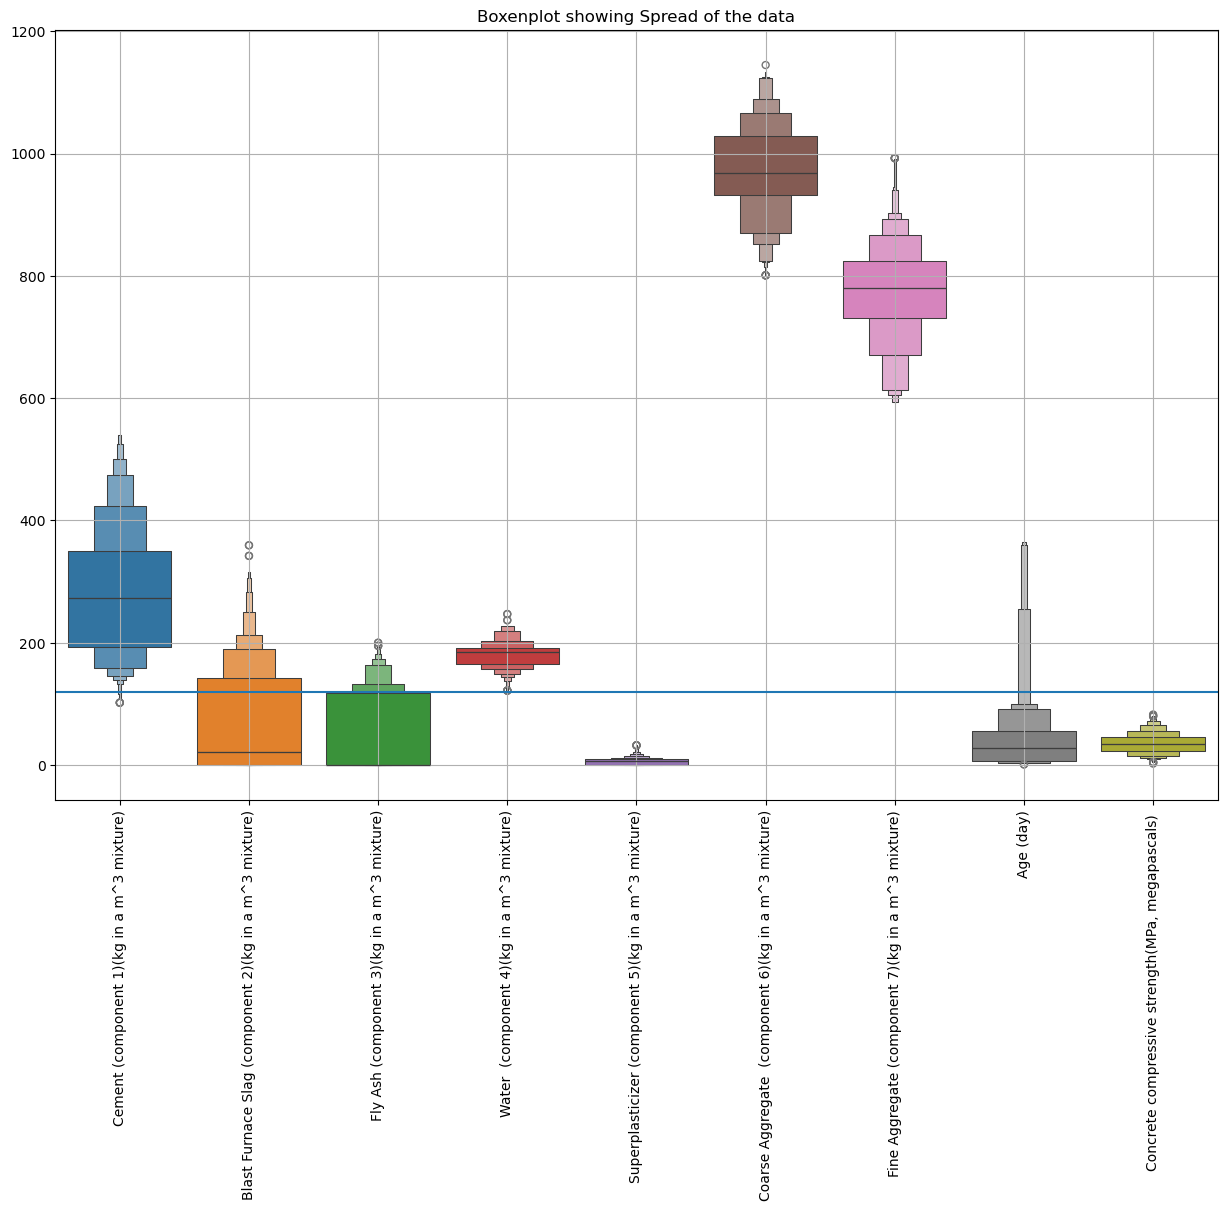

In [28]:
plt.figure(figsize = (15,10))
sns.boxenplot(df)
plt.axhline(120)
plt.xticks(rotation = 90 )
plt.title('Boxenplot showing Spread of the data')

plt.grid()
plt.show()

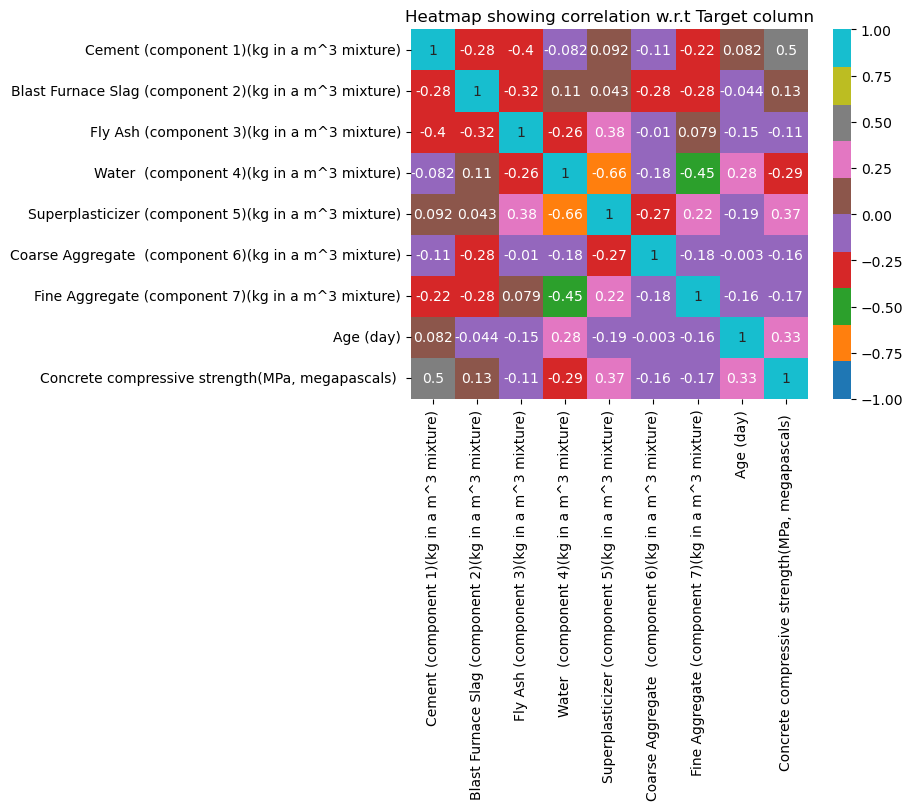

In [39]:
 sns.heatmap(df.corr(),annot = True, center = 0, vmax = 1, vmin = -1 , cmap = 'tab10')
plt.title('Heatmap showing correlation w.r.t Target column')
plt.show()

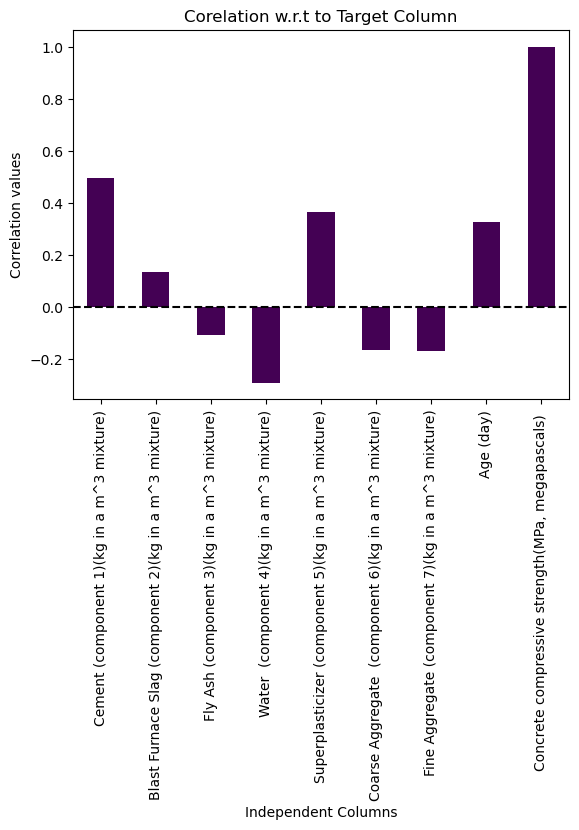

In [52]:
df.corr()['Concrete compressive strength(MPa, megapascals) '].plot(kind = 'bar', cmap = 'viridis')
plt.axhline(0,linestyle = '--', color = 'black')
plt.title('Corelation w.r.t to Target Column')
plt.ylabel('Correlation values')
plt.xlabel('Independent Columns')
plt.show()